# 08 Mosaic plots and segmented bar charts

In [145]:
%%html
<iframe width="700" height="400" src="https://www.youtube.com/embed/b9G5pWuxb1Y/" frameborder="0" allowfullscreen></iframe>


In [1]:
%%html
<iframe width="700" height="400" src="https://www.youtube.com/embed/b9G5pWuxb1Y/" frameborder="0" allowfullscreen></iframe>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

Matplotlib is building the font cache; this may take a moment.


In [2]:
import findspark

findspark.init()
from pyspark.context import SparkContext
from pyspark.sql import functions as F
from pyspark.sql.session import SparkSession

spark = SparkSession.builder.appName("statistics").master("local").getOrCreate()

[khanacademy](https://www.khanacademy.org/math/ap-statistics/analyzing-categorical-ap/xfb5d8e68:mosaic-plots/v/mosaic-plots-intro?modal=1)

![Mosaic plots and segmented bar charts fig 1](./imgs/01-08-01.png)

In [3]:
dataset = {
    "Age": ["Adults", "Children", "Infants"],
    "Yes": [114, 54, 8],
    "No": [6, 6, 12],
}

In [4]:
df = pd.DataFrame(dataset).set_index("Age")
df

,Yes,No
Age,,
Adults,114,6
Children,54,6
Infants,8,12


In [5]:
sdf = spark.createDataFrame(zip(*dataset.values()), schema=list(dataset.keys()))
sdf.show()

+--------+---+---+
|     Age|Yes| No|
+--------+---+---+
|  Adults|114|  6|
|Children| 54|  6|
| Infants|  8| 12|
+--------+---+---+



In [7]:
df_pct = df.copy()
df_pct["sum"] = df_pct["Yes"] + df_pct["No"]
df_pct["Yes"] = df_pct["Yes"] * 100 / df_pct["sum"]
df_pct["No"] = df_pct["No"] * 100 / df_pct["sum"]
df_pct = df_pct.drop(columns=["sum"])
df_pct

,Yes,No
Age,,
Adults,95.0,5.0
Children,90.0,10.0
Infants,40.0,60.0


## Segmented bar chart

<AxesSubplot:xlabel='Age'>

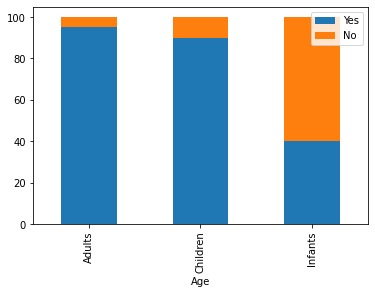

In [8]:
df_pct.plot(kind="bar", stacked=True)

Text(0, 0.5, 'Percent')

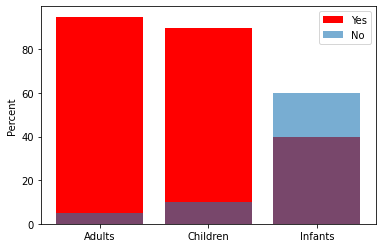

In [9]:
plt.bar(df_pct.index, df_pct["Yes"], color="red")
plt.bar(df_pct.index, df_pct["No"], alpha=0.6)
plt.legend(["Yes", "No"])
plt.ylabel("Percent")

In [10]:
melt_df = df_pct.reset_index().melt(
    id_vars="Age", var_name="Anwser", value_name="Percentage"
)
melt_df

,Age,Anwser,Percentage
0,Adults,Yes,95.0
1,Children,Yes,90.0
2,Infants,Yes,40.0
3,Adults,No,5.0
4,Children,No,10.0
5,Infants,No,60.0


<AxesSubplot:xlabel='Age', ylabel='Percentage'>

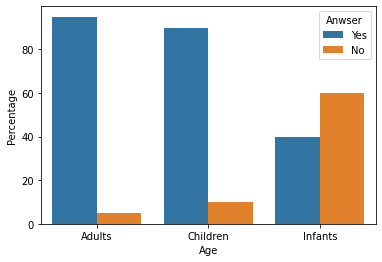

In [11]:
sns.barplot(x="Age", y="Percentage", hue="Anwser", data=melt_df)

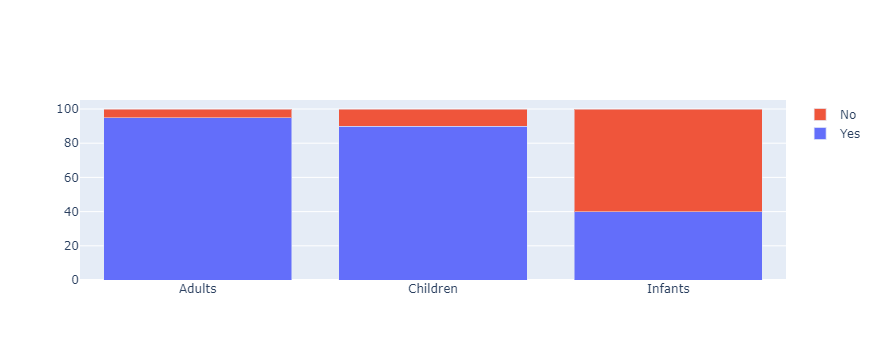

In [13]:
data = [
    go.Bar(x=df_pct.index, y=df_pct["Yes"], name="Yes"),
    go.Bar(x=df_pct.index, y=df_pct["No"], name="No"),
]
layout = go.Layout(barmode="stack")
fig = go.Figure(data, layout)
fig.show()

## Mosaic plot

(<Figure size 432x288 with 3 Axes>,
 {('Adults', 'Yes'): (0.0, 0.0, 0.594059405940594, 0.9468438538205979),
  ('Adults', 'No'): (0.0,
   0.9501661129568105,
   0.594059405940594,
   0.04983388704318941),
  ('Children', 'Yes'): (0.599009900990099,
   0.0,
   0.29702970297029707,
   0.8970099667774086),
  ('Children', 'No'): (0.599009900990099,
   0.9003322259136212,
   0.29702970297029707,
   0.09966777408637871),
  ('Infants', 'Yes'): (0.900990099009901,
   0.0,
   0.09900990099009899,
   0.39867109634551495),
  ('Infants', 'No'): (0.900990099009901,
   0.4019933554817276,
   0.09900990099009899,
   0.5980066445182723)})

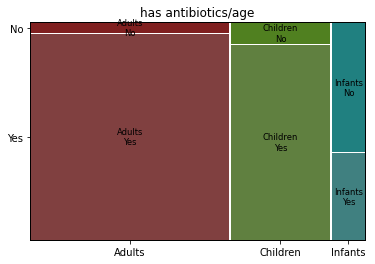

In [75]:
mosaic(df.stack(), title="has antibiotics/age")

In [4]:
x: np.ndarray = np.array([1, 2, 3])

array([1, 2, 3])

In [ ]:
print()